# 1. Regularized Linear Regression
## 1.1 visualizing the dataset

In [1]:
import os
import scipy.io as sio
import scipy.optimize as opt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

data_file = Path(os.path.abspath('')) / 'data' / 'ex5data1.mat'
data_set = sio.loadmat(data_file)

X = data_set['X']
y = data_set['y']
X_test = data_set['Xtest']
y_test = data_set['ytest']
X_val = data_set['Xval']
y_val = data_set['yval']

print("X:{}".format(X.shape))
print("y:{}".format(y.shape))
print("X_test:{}".format(X_test.shape))
print("y_test:{}".format(y_test.shape))
print("X_val:{}".format(X_val.shape))
print("y_val:{}".format(y_val.shape))

X:(12, 1)
y:(12, 1)
X_test:(21, 1)
y_test:(21, 1)
X_val:(21, 1)
y_val:(21, 1)


## 1.2 Regularized linear regression cost function

In [2]:
theta = np.array([[1], [1]])

def linear_regression_cost(theta, lamda, X, y):
    input_X = np.insert(X, 0, np.ones(X.shape[0]), 1)
    m = y.shape[0]
    cost = 1 / (2 * m) * np.sum((input_X @ theta - y) ** 2)
    regularization = lamda / (2 * m) * np.sum(theta[1:] ** 2)
    return cost + regularization

print(linear_regression_cost(theta, 1, X, y))

303.9931922202643


## 1.3 Regularized linear regression gradient 

In [3]:
def linear_regression_gradient(theta, lamda, X, y):
    input_X = np.insert(X, 0, np.ones(X.shape[0]), 1)
    m = y.shape[0]
    theta_zero_gradient = 1 / m * input_X[:, 0:1].T @ (input_X @ theta - y)
    theta_rest_gradient = 1 / m * input_X[:, 1:].T @ (input_X @ theta - y) + lamda / m * theta[1:]
    gradient = np.insert(theta_rest_gradient, 0, theta_zero_gradient, 0)
    return gradient

def linear_regression_cost_function(theta, lamda, X, y):
    cost = linear_regression_cost(theta, lamda, X, y)
    gradient = linear_regression_gradient(theta, lamda, X, y)
    return cost, gradient

print(linear_regression_cost_function(theta, 1, X, y))

(303.9931922202643, array([[-15.30301567],
       [598.25074417]]))


## 1.4 Fitting linear regression

[[13.08790372]
 [ 0.36777923]]


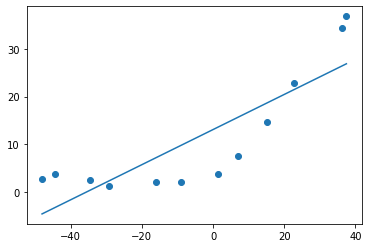

In [4]:
lamda = 0

res = opt.minimize(fun=linear_regression_cost, x0=theta, args=(lamda, X, y.flatten()), method='TNC', jac=linear_regression_gradient)
learned_theta = res.x.reshape((res.x.shape[0], 1))
print(learned_theta)

x_vector = np.linspace(np.min(X), np.max(X), 100)
x_constructed = np.insert(np.array([x_vector]), 0, np.ones(100), axis=0)
y_constructed = x_constructed.T @ learned_theta
y_vector = y_constructed.flatten()
fig, ax = plt.subplots()
ax.scatter(list(X), list(y), marker='o')
ax.plot(x_vector, y_vector, "-")
fig.show()

# 2. Bias-variance
## 2.1 Learning curves

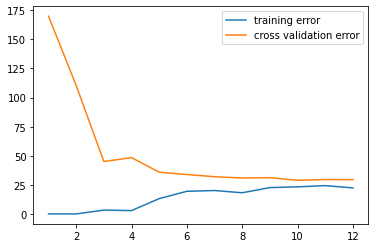

In [5]:
m = y.shape[0]

train_error_array = []
val_error_array = []

for s in range(1, m + 1):
    X_train = X[0:s]
    y_train = y[0:s]
    res = opt.minimize(fun=linear_regression_cost, x0=theta, args=(lamda, X_train, y_train.flatten()), method='TNC', jac=linear_regression_gradient)
    learned_theta = res.x.reshape((res.x.shape[0], 1))
    train_error = linear_regression_cost(learned_theta, 0, X_train, y_train)
    val_error = linear_regression_cost(learned_theta, 0, X_val, y_val)
    train_error_array.append([s, train_error])
    val_error_array.append([s, val_error])

fig, ax = plt.subplots(1)
ax.plot(np.array(train_error_array)[:, 0], np.array(train_error_array)[:, 1], '-', label='training error')
ax.plot(np.array(val_error_array)[:, 0], np.array(val_error_array)[:, 1], '-', label='cross validation error')
ax.legend(loc="upper right")
fig.show()

# 3. Polynomial regression
## 3.1 Learning Polynomial Regression

[[ 11.21735528]
 [ 10.28635161]
 [ 20.31109968]
 [ 17.42959593]
 [-40.51092754]
 [-42.72536821]
 [ 37.94442756]
 [ 34.36304008]
 [ -4.3226867 ]]


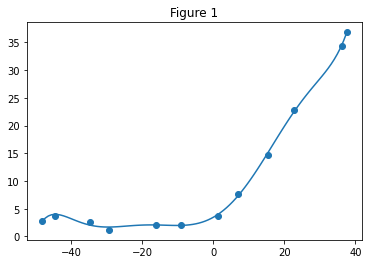

In [6]:
# try lamda = 0, 1, 10, 100
lamda = 0
p = 8
theta_poly = np.ones((p + 1, 1))

def map_feature(x, p):
    new_x = np.squeeze(np.array([x ** i for i in range(1, p + 1)]).T, axis = 0)
    return new_x

def featureNormalize(x):
    mu = np.mean(x, axis=0).reshape((1, x.shape[1]))
    sigma = np.std(x, axis=0).reshape((1, x.shape[1]))
    normalized_x = (x - mu) / sigma
    return normalized_x, mu, sigma

# normalize X
X_poly = map_feature(X, p)
X_poly_normalized, mu, sigma = featureNormalize(X_poly)

# normalize X_val
X_poly_val = map_feature(X_val, p)
X_poly_normalized_val = (X_poly_val - mu) / sigma

# normalize X_test
X_poly_test = map_feature(X_test, p)
X_poly_normalized_test = (X_poly_test - mu) / sigma

# get learned_theta_poly
res = opt.minimize(fun=linear_regression_cost, x0=theta_poly, args=(lamda, X_poly_normalized, y.flatten()), method='TNC', jac=linear_regression_gradient)
learned_theta_poly = res.x.reshape((res.x.shape[0], 1))
print(learned_theta_poly)

# prepare plot vectors
x_poly_vector = map_feature(x_vector.reshape((x_vector.shape[0], 1)), p)
x_poly_vector_normalized = (x_poly_vector - mu) / sigma
x_poly_constructed = np.insert(x_poly_vector_normalized, 0, np.ones(x_poly_vector_normalized.shape[0]), axis=1)
y_poly_constructed = x_poly_constructed @ learned_theta_poly
y_poly_vector = y_poly_constructed.flatten()

fig, ax = plt.subplots()
ax.scatter(list(X), list(y), marker='o')
ax.plot(x_vector, y_poly_vector, "-")
ax.set_title("Figure 1")
fig.show()

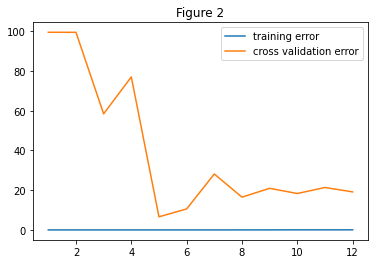

In [7]:
train_error_array = []
val_error_array = []

for s in range(1, m + 1):
    X_train = X_poly_normalized[0:s]
    y_train = y[0:s]
    res = opt.minimize(fun=linear_regression_cost, x0=theta_poly, args=(lamda, X_train, y_train.flatten()), method='TNC', jac=linear_regression_gradient)
    learned_theta = res.x.reshape((res.x.shape[0], 1))
    train_error = linear_regression_cost(learned_theta, 0, X_train, y_train)
    val_error = linear_regression_cost(learned_theta, 0, X_poly_normalized_val, y_val)
    train_error_array.append([s, train_error])
    val_error_array.append([s, val_error])

fig, ax = plt.subplots(1)
ax.plot(np.array(train_error_array)[:, 0], np.array(train_error_array)[:, 1], '-', label='training error')
ax.plot(np.array(val_error_array)[:, 0], np.array(val_error_array)[:, 1], '-', label='cross validation error')
ax.legend(loc="upper right")
ax.set_title("Figure 2")
fig.show()

## Analysis

From Figure 1, you should see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

To better understand the problems with the unregularized (lamda = 0) model, you can see that the learning curve (Figure 2) shows the same effect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem. One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, you will get to try different lamda parameters to see how regularization can lead to a better model.

## 3.2 Adjusting the regularization parameter

set lamda = 1, 10, 100 and run 3.1 again

For lamda = 1, you should see a polynomial fit that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows the  regularized polynomial regression model does not have the high bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

For lamda = 100, you should see a polynomial fit that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

## 3.3 Selecting lambda using a cross validation set

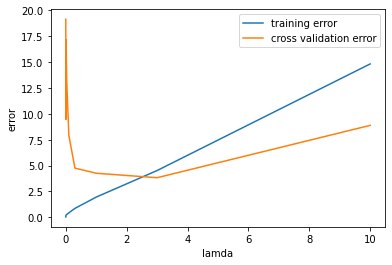

In [8]:
lamda_list = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

train_error_array = []
val_error_array = []

for lamda in lamda_list:
    res = opt.minimize(fun=linear_regression_cost, x0=theta_poly, args=(lamda, X_poly_normalized, y.flatten()), method='TNC', jac=linear_regression_gradient)
    learned_theta = res.x.reshape((res.x.shape[0], 1))
    train_error = linear_regression_cost(learned_theta, 0, X_poly_normalized, y)
    val_error = linear_regression_cost(learned_theta, 0, X_poly_normalized_val, y_val)
    train_error_array.append([lamda, train_error])
    val_error_array.append([lamda, val_error])

fig, ax = plt.subplots(1)
ax.plot(np.array(train_error_array)[:, 0], np.array(train_error_array)[:, 1], '-', label='training error')
ax.plot(np.array(val_error_array)[:, 0], np.array(val_error_array)[:, 1], '-', label='cross validation error')
ax.legend(loc="upper right")
ax.set_xlabel("lamda")
ax.set_ylabel("error")
fig.show()

## 3.4 Computing test set error

In [9]:
lamda_best = 3

res = opt.minimize(fun=linear_regression_cost, x0=theta_poly, args=(lamda_best, X_poly_normalized, y.flatten()), method='TNC', jac=linear_regression_gradient)
learned_theta = res.x.reshape((res.x.shape[0], 1))
test_error = linear_regression_cost(learned_theta, 0, X_poly_normalized_test, y_test)
print(test_error)

3.572026100554305


## 3.5 Plotting learning curves with randomly selected examples

In practice, especially for small training sets, when you plot learning curves to debug your algorithms, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross validation error. Concretely, to determine the training error and cross validation error for i examples, you should first randomly select i examples from the training set and i examples from the cross validation set. You will then learn the parameters theta using the randomly chosen training set and evaluate the parameters theta on the randomly chosen training set and cross validation set. The above steps should then be repeated multiple times (say 50) and the averaged error should be used to determine the training error and cross validation error for i examples.

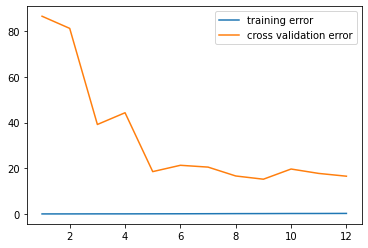

In [10]:
random_pick_times = 50
lamda = 0.01
train_error_array = []
val_error_array = []

for s in range(1, m + 1):
    train_error_array_temp = []
    val_error_array_temp = []
    for i in range(50):
        train_indexes = np.random.choice(X_poly_normalized.shape[0], size=s, replace=False)
        val_indexes = np.random.choice(X_poly_normalized_val.shape[0], size=s, replace=False)
        X_train_pick = X_poly_normalized[train_indexes]
        y_train_pick = y[train_indexes]
        X_val_pick = X_poly_normalized_val[val_indexes]
        y_val_pick = y_val[val_indexes]
        res = opt.minimize(fun=linear_regression_cost, x0=theta_poly, args=(lamda, X_train_pick, y_train_pick.flatten()), method='TNC', jac=linear_regression_gradient)
        learned_theta = res.x.reshape((res.x.shape[0], 1))
        train_error = linear_regression_cost(learned_theta, 0, X_train_pick, y_train_pick)
        val_error = linear_regression_cost(learned_theta, 0, X_val_pick, y_val_pick)
        train_error_array_temp.append(train_error)
        val_error_array_temp.append(val_error)

    train_error_average = np.mean(train_error_array_temp)
    val_error_average = np.mean(val_error_array_temp)
    train_error_array.append([s, train_error_average])
    val_error_array.append([s, val_error_average])

fig, ax = plt.subplots(1)
ax.plot(np.array(train_error_array)[:, 0], np.array(train_error_array)[:, 1], '-', label='training error')
ax.plot(np.array(val_error_array)[:, 0], np.array(val_error_array)[:, 1], '-', label='cross validation error')
ax.legend(loc="upper right")
fig.show()